In [1]:
import pandas as pd
import numpy as np

In [2]:
def ELM_train(X_data, Y_data, num_neuronios):
    p = num_neuronios
    X = X_data
    Y = Y_data
    n = X.shape[1]
    Z = np.random.uniform(low = -0.5, high = 0.5, size = (n+1, p))
    Xaug = np.append(X, np.ones((X.shape[0], 1)), 1)
    H = np.tanh(np.matmul(Xaug, Z))
    W = np.matmul(np.linalg.pinv(H), Y)
    return W, H, Z
 
def ELM_y(X_data, W, Z):
    X = X_data
    Xaug_t = np.append(X, np.ones((X.shape[0], 1)), 1)
    H_t = np.tanh(np.matmul(Xaug_t, Z))
    Y_hat = np.matmul(H_t, W)
    return np.where(Y_hat > 0, 1, -1)

In [3]:
data = pd.read_csv('mammographic_masses_frac.data', index_col = 0)
test = pd.read_csv('mammographic_masses_frac.test', index_col = 0)
data

,0,1,2,3,4,5
832,6,72,4,3,3,1
125,4,59,4,3,2,0
656,5,67,4,4,3,1
844,4,35,1,1,3,0
64,5,74,4,4,3,1
...,...,...,...,...,...,...
246,4,40,2,1,3,0
520,4,62,4,0,3,1
449,5,80,4,4,3,1
326,4,37,2,1,2,0


In [4]:
X_data_train = data.iloc[:, 0:-1].to_numpy()
Y_data_train = data.iloc[:, -1].to_numpy()

X_data_test = test.iloc[:, 0:-1].to_numpy()
Y_data_test = test.iloc[:, -1].to_numpy()

In [5]:
Y_data_train = np.where(Y_data_train == 0, -1, 1)
Y_data_test = np.where(Y_data_test == 0, -1, 1)

In [6]:
num_neuronios = [2, 10, 30, 50, 100, 200, 500, 1000]
acc = []
for num in num_neuronios:
    acc_aux = []
    for i in range (10):
        W, H, Z = ELM_train(X_data_train, Y_data_train, num)
        Y_data_val = ELM_y(X_data_test, W, Z)
        acc_aux.append((Y_data_val == Y_data_test).mean())
    acc.append(np.mean(acc_aux))
acc

[0.5754325259515571,
 0.6788927335640139,
 0.7467128027681661,
 0.7470588235294118,
 0.77439446366782,
 0.7667820069204152,
 0.7162629757785467,
 0.654325259515571]

<IPython.core.display.Javascript object>


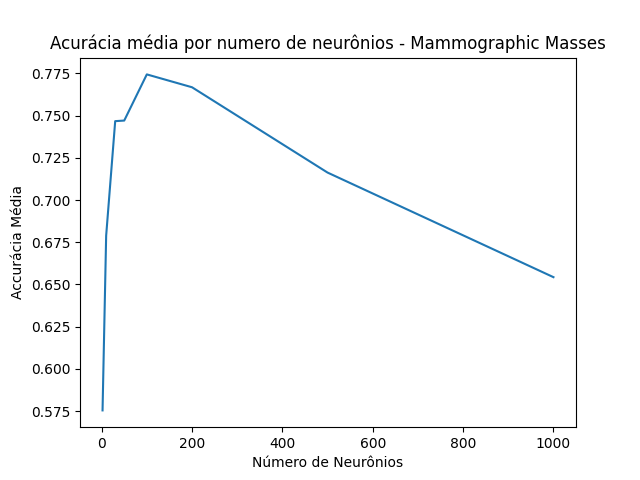

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.plot(num_neuronios, acc)
plt.xlabel('Número de Neurônios')
plt.ylabel('Accurácia Média')
plt.title('Acurácia média por numero de neurônios - Mammographic Masses')
plt.show()

[0.789236111111111]